In [1]:
# !pip install tensorflow_hub

In [2]:
import os
import pandas as pd
import tensorflow_hub as hub
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [3]:
module = hub.load("https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2")
path = "../crops/book/crops/book"
file_list = os.listdir(path)
file_list_img = [file for file in file_list if file.endswith(".png") or file.endswith(".jpeg") or file.endswith(".jpg")]

In [82]:
tmp_df = pd.DataFrame()
for i, img in enumerate(file_list_img):
    image = Image.open(path+'/'+img).convert('RGB')

    img_input = tf.keras.preprocessing.image.img_to_array(image, data_format='channels_last')
    img_input = np.array([img_input])
    output = np.array(module(img_input))
    tmp_df = tmp_df.append({'filename':img, 'output':output}, ignore_index=True)

In [5]:
from sklearn.metrics.pairwise import cosine_similarity
cos_sim_array = np.zeros((len(tmp_df),len(tmp_df)))
for i in range(0, len(tmp_df)):
    for j in range(0, len(tmp_df)):
        cos_sim_array[i][j] = cosine_similarity(tmp_df['output'][i] , tmp_df['output'][j])

In [6]:
file_list = tmp_df['filename'].tolist()
cos_sim_df = pd.DataFrame(cos_sim_array, index=file_list, columns=file_list)

In [8]:
jpg_test = cos_sim_df['V0004168H08050006-1.jpg'].sort_values(ascending=False)[:10]

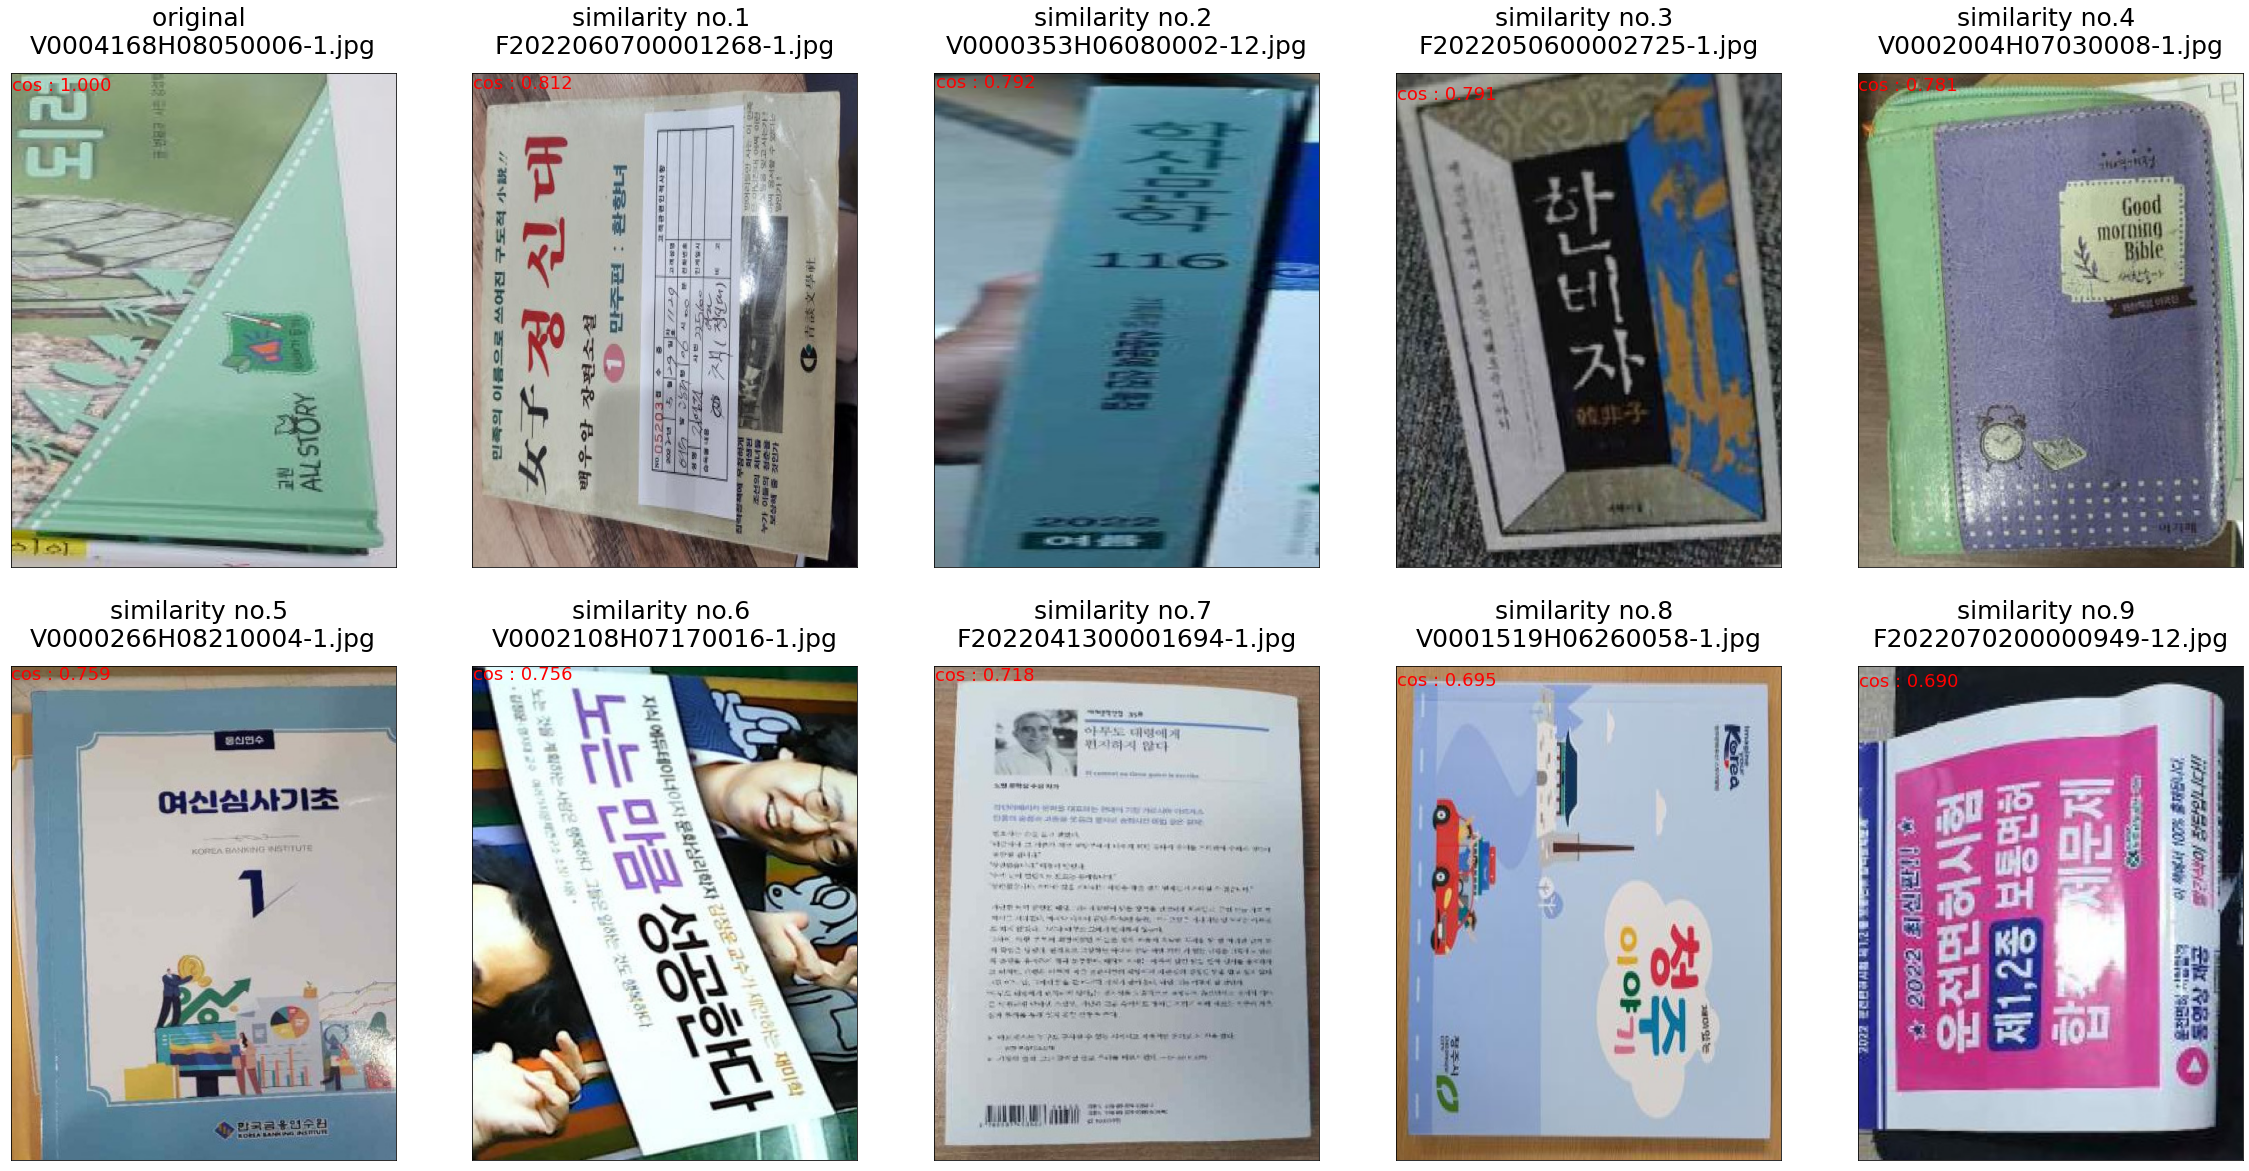

In [78]:
def show_sim(filename):
    jpg_test = cos_sim_df[filename].sort_values(ascending=False)[:10]
    f, ax = plt.subplots(2, 5, figsize=(40,20))
    for i in range(len(jpg_test)): 
        tmp_img = Image.open(path+'/'+jpg_test.index[i]).convert('RGB')
        sim = f'cos : {jpg_test[i]:.3f}'
        ax[i//5][i%5].imshow(tmp_img, aspect='auto')
        if i == 0: 
            title = f'original \n{jpg_test.index[i]}' 
        else: title = f'similarity no.{i} \n{jpg_test.index[i]}'
        ax[i//5][i%5].set_title(title, pad=20, size=25)
        ax[i//5][i%5].annotate(sim, (0,10), fontsize=18, color='red')
        ax[i//5][i%5].set_xticks([]); ax[i//5][i%5].set_yticks([])
        
    fig1 = plt.gcf() # plt.show 이후에 save를 하면 안됨
    plt.show()
    fig1.savefig(f'test_{filename}', format='jpeg')

show_sim('V0004168H08050006-1.jpg')

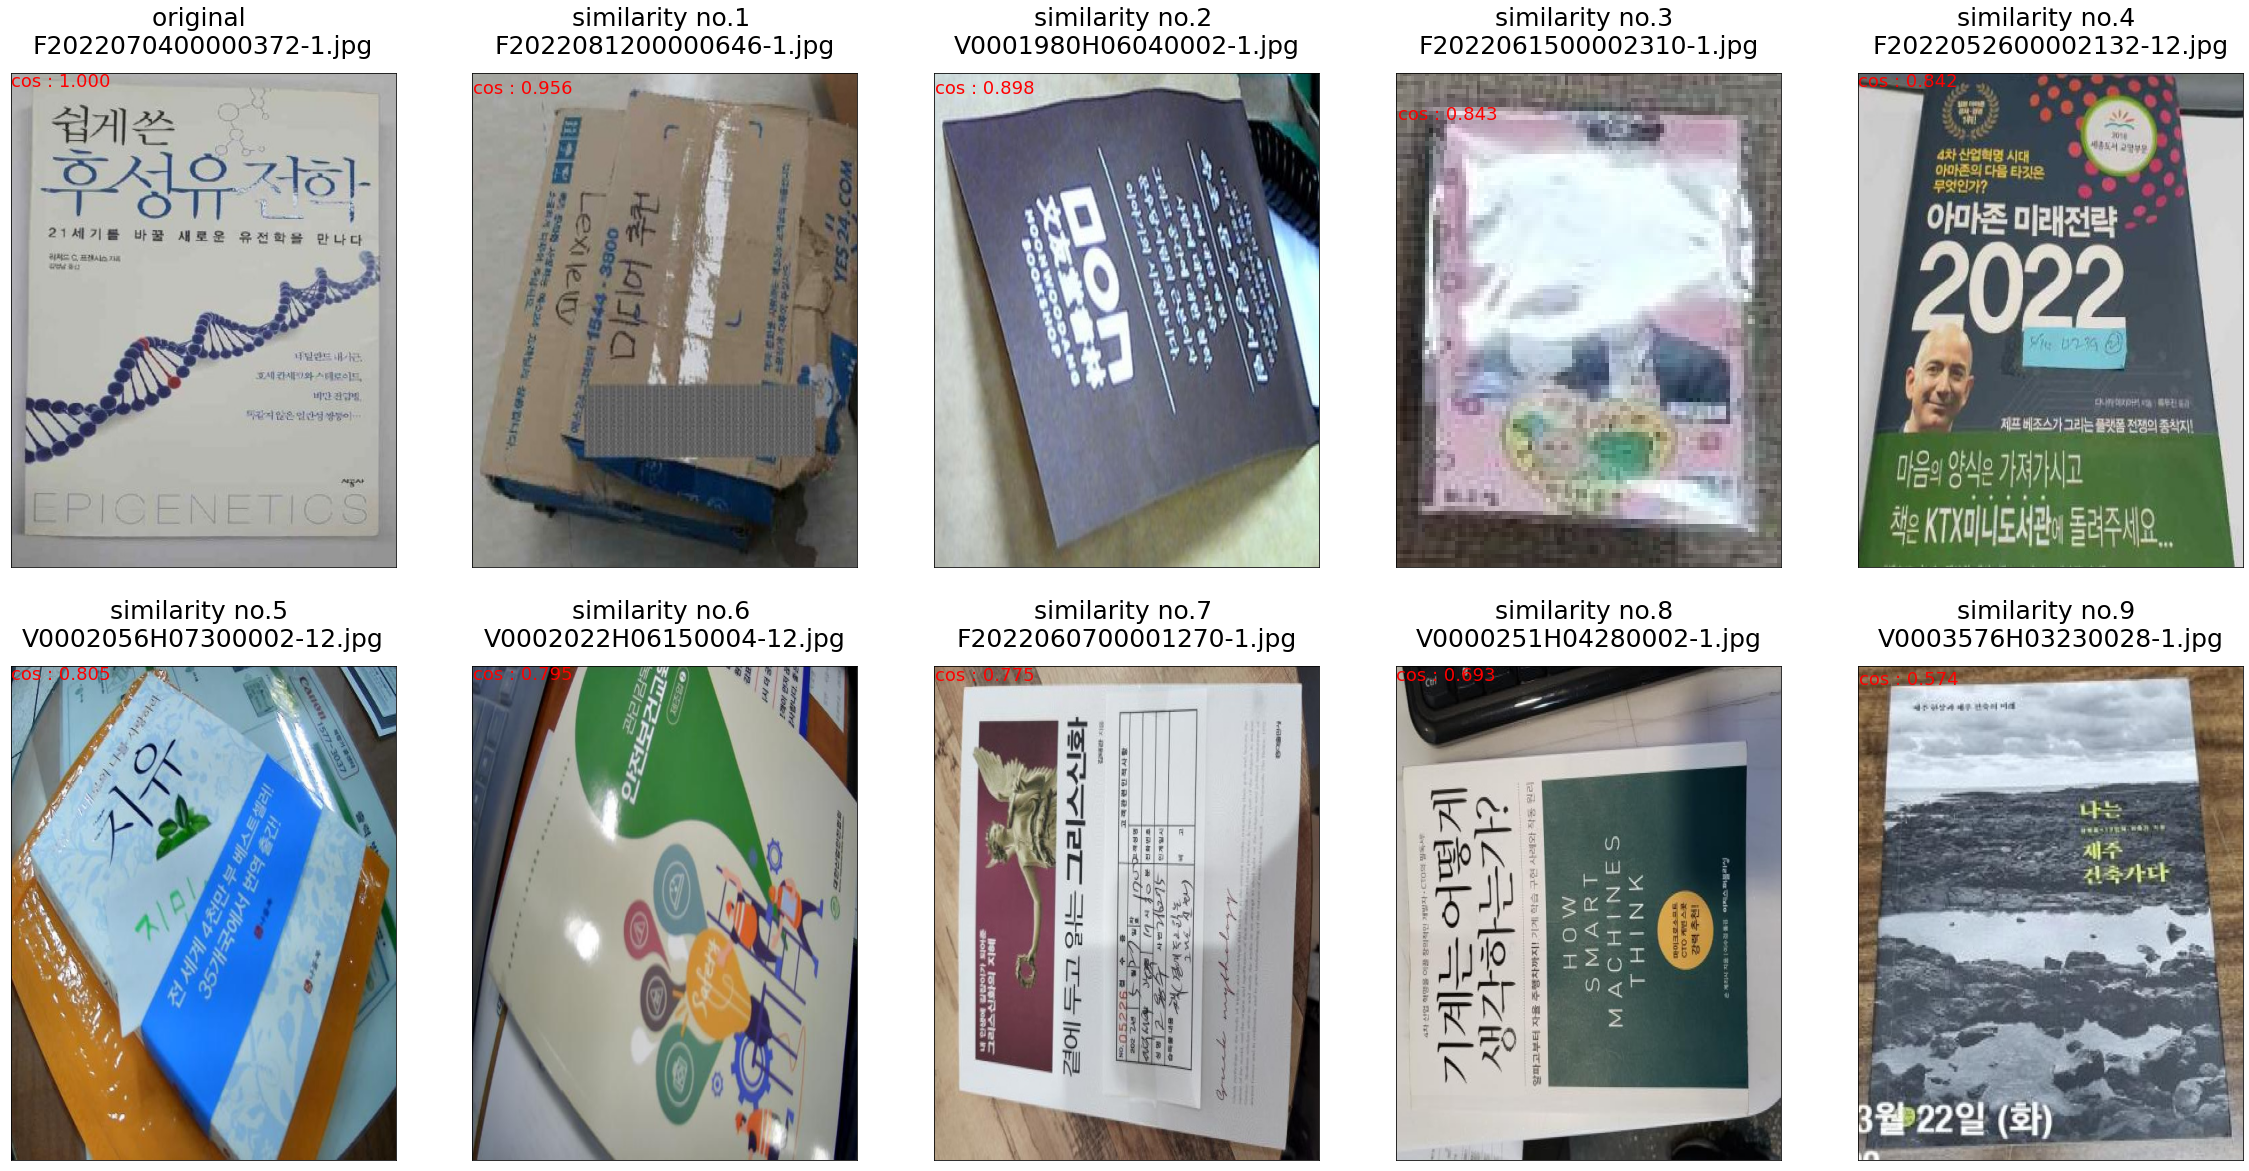

In [79]:
show_sim('F2022070400000372-1.jpg')

In [80]:
cos_sim_df.to_csv('cos_sim_eff_v2_b0.csv',index=False) # csv파일 출력